In [11]:
# Create a spark session and import the required libraries

import findspark
findspark.init()
from pyspark.sql import *
from pyspark.sql.functions import col,countDistinct,expr,concat,regexp_extract

In [12]:
# build session 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("WSN-DS").getOrCreate()

In [13]:
from pyspark.sql.types import DoubleType, StringType, StructType, StructField, IntegerType, TimestampType

# loading data

In [14]:
#  Create a data schema programatically

schema = StructType([StructField("id", IntegerType(), False),
                     StructField("Time", IntegerType(), False),
                     StructField("Is_CH", IntegerType(), False),
                     StructField("who_CH", IntegerType(), False),
                     StructField("Dist_To_CH",DoubleType(), False),
                     StructField("ADV_S", IntegerType(), False),
                     StructField("ADV_R", IntegerType(), False),
                     StructField("JOIN_S", IntegerType(), False),
                     StructField("JOIN_R", IntegerType(), False),
                     StructField("SCH_S", IntegerType(), False),
                     StructField("SCH_R", IntegerType(), False),
                     StructField("Rank", IntegerType(), False),
                     StructField("DATA_S", IntegerType(), False),
                     StructField("DATA_R", IntegerType(), False),
                     StructField("Data_Sent_To_BS", IntegerType(), False),
                     StructField("dist_CH_To_BS", DoubleType(), False),
                     StructField("send_code", IntegerType(), False),
                     StructField("Expaned_Energy", DoubleType(), False),
                     StructField("Attack_type", StringType(), False)])

In [15]:
# Read the data using the standard DataReader (Key,Value) pairs format

data = spark.read.csv("data/WSN-DS.csv", header="true", schema=schema, inferSchema="true")

# Explore the data 

In [7]:
# Print the Schema

data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Time: integer (nullable = true)
 |-- Is_CH: integer (nullable = true)
 |-- who_CH: integer (nullable = true)
 |-- Dist_To_CH: double (nullable = true)
 |-- ADV_S: integer (nullable = true)
 |-- ADV_R: integer (nullable = true)
 |-- JOIN_S: integer (nullable = true)
 |-- JOIN_R: integer (nullable = true)
 |-- SCH_S: integer (nullable = true)
 |-- SCH_R: integer (nullable = true)
 |-- Rank: integer (nullable = true)
 |-- DATA_S: integer (nullable = true)
 |-- DATA_R: integer (nullable = true)
 |-- Data_Sent_To_BS: integer (nullable = true)
 |-- dist_CH_To_BS: double (nullable = true)
 |-- send_code: integer (nullable = true)
 |-- Expaned_Energy: double (nullable = true)
 |-- Attack_type: string (nullable = true)



In [9]:
# show first 10 rows in the data

data.show(10)

+------+----+-----+------+----------+-----+-----+------+------+-----+-----+----+------+------+---------------+-------------+---------+--------------+-----------+
|    id|Time|Is_CH|who_CH|Dist_To_CH|ADV_S|ADV_R|JOIN_S|JOIN_R|SCH_S|SCH_R|Rank|DATA_S|DATA_R|Data_Sent_To_BS|dist_CH_To_BS|send_code|Expaned_Energy|Attack_type|
+------+----+-----+------+----------+-----+-----+------+------+-----+-----+----+------+------+---------------+-------------+---------+--------------+-----------+
|101000|  50|    1|101000|       0.0|    1|    0|     0|    25|    1|    0|   0|     0|  1200|             48|    130.08535|        0|        2.4694|     Normal|
|101001|  50|    0|101044|  75.32345|    0|    4|     1|     0|    0|    1|   2|    38|     0|              0|          0.0|        4|       0.06957|     Normal|
|101002|  50|    0|101010|  46.95453|    0|    4|     1|     0|    0|    1|  19|    41|     0|              0|          0.0|        3|       0.06898|     Normal|
|101003|  50|    0|101044|  

In [20]:
# Explore null values and show how many null values in each column

import pyspark.sql.functions as F
null_col = []
for name in data.columns:
    null_val = data.where(F.col(name).isNull()).count()
    if(null_val > 0):
        null_col.append((name, null_val))
print(null_col)

[]


<AxesSubplot:xlabel='Is_CH', ylabel='count'>

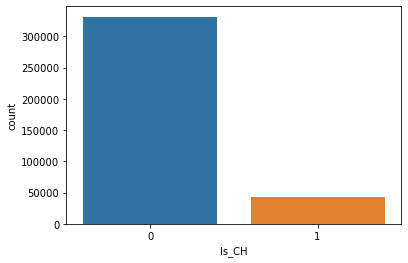

In [11]:
# Plot a count plot for the target label and notice the graph

import seaborn as sns
sns.countplot(data=data.select(F.col('Is_CH')).toPandas(),x='Is_CH')

<AxesSubplot:xlabel='Attack_type', ylabel='count'>

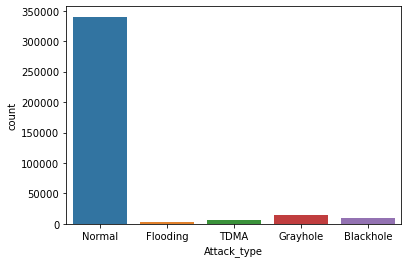

In [15]:
# Plot a count plot for the target label and notice the graph

import seaborn as sns
sns.countplot(data=data.select(F.col('Attack_type')).toPandas(),x='Attack_type')

In [16]:
# show each target and its classes

age_group = data.groupBy('Is_CH').count().orderBy('Is_CH',ascending=True)
age_group.show()

+-----+------+
|Is_CH| count|
+-----+------+
|    0|331288|
|    1| 43373|
+-----+------+



In [17]:
# show each target and its classes

age_group = data.groupBy('Attack_type').count().orderBy('Attack_type',ascending=True)
age_group.show()

+-----------+------+
|Attack_type| count|
+-----------+------+
|  Blackhole| 10049|
|   Flooding|  3312|
|   Grayhole| 14596|
|     Normal|340066|
|       TDMA|  6638|
+-----------+------+



In [20]:
# mapping Attack_type column

def Attack_type_col_Func(col):
    if col == 'Normal':
        return 0
    elif col == 'Blackhole':
        return 1
    elif col == 'Flooding':
        return 2
    elif col == 'Grayhole':
        return 3
    else:
        return 4

In [14]:
# apply the mapping on "Attack_type"

#Attack_type2 = F.udf(Attack_type_col_Func, IntegerType())
#data = data.withColumn('Attack_type', Attack_type2('Attack_type'))
#data.show()

+------+----+-----+------+----------+-----+-----+------+------+-----+-----+----+------+------+---------------+-------------+---------+--------------+-----------+
|    id|Time|Is_CH|who_CH|Dist_To_CH|ADV_S|ADV_R|JOIN_S|JOIN_R|SCH_S|SCH_R|Rank|DATA_S|DATA_R|Data_Sent_To_BS|dist_CH_To_BS|send_code|Expaned_Energy|Attack_type|
+------+----+-----+------+----------+-----+-----+------+------+-----+-----+----+------+------+---------------+-------------+---------+--------------+-----------+
|101000|  50|    1|101000|       0.0|    1|    0|     0|    25|    1|    0|   0|     0|  1200|             48|    130.08535|        0|        2.4694|          0|
|101001|  50|    0|101044|  75.32345|    0|    4|     1|     0|    0|    1|   2|    38|     0|              0|          0.0|        4|       0.06957|          0|
|101002|  50|    0|101010|  46.95453|    0|    4|     1|     0|    0|    1|  19|    41|     0|              0|          0.0|        3|       0.06898|          0|
|101003|  50|    0|101044|  

In [26]:
# Split the data into training and test dataframes

trainX, testX = data.randomSplit([0.8, 0.2], seed = 42)

trainX.write.parquet("train.parquet")
testX.write.parquet("test.parquet")

trainX = spark.read.parquet("train.parquet")
testX = spark.read.parquet("test.parquet")

In [27]:
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Time: integer (nullable = true)
 |-- Is_CH: integer (nullable = true)
 |-- who_CH: integer (nullable = true)
 |-- Dist_To_CH: double (nullable = true)
 |-- ADV_S: integer (nullable = true)
 |-- ADV_R: integer (nullable = true)
 |-- JOIN_S: integer (nullable = true)
 |-- JOIN_R: integer (nullable = true)
 |-- SCH_S: integer (nullable = true)
 |-- SCH_R: integer (nullable = true)
 |-- Rank: integer (nullable = true)
 |-- DATA_S: integer (nullable = true)
 |-- DATA_R: integer (nullable = true)
 |-- Data_Sent_To_BS: integer (nullable = true)
 |-- dist_CH_To_BS: double (nullable = true)
 |-- send_code: integer (nullable = true)
 |-- Expaned_Energy: double (nullable = true)
 |-- Attack_type: string (nullable = true)



In [17]:

x = data.columns

In [18]:
x.pop(0)

'id'

In [19]:
# now x is a list which contain all columns except 'id'
x

['Time',
 'Is_CH',
 'who_CH',
 'Dist_To_CH',
 'ADV_S',
 'ADV_R',
 'JOIN_S',
 'JOIN_R',
 'SCH_S',
 'SCH_R',
 'Rank',
 'DATA_S',
 'DATA_R',
 'Data_Sent_To_BS',
 'dist_CH_To_BS',
 'send_code',
 'Expaned_Energy',
 'Attack_type']

In [20]:
# make the assembler to be trained
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder


assemblerInputs = x
assemblerInputs

['Time',
 'Is_CH',
 'who_CH',
 'Dist_To_CH',
 'ADV_S',
 'ADV_R',
 'JOIN_S',
 'JOIN_R',
 'SCH_S',
 'SCH_R',
 'Rank',
 'DATA_S',
 'DATA_R',
 'Data_Sent_To_BS',
 'dist_CH_To_BS',
 'send_code',
 'Expaned_Energy',
 'Attack_type']

In [21]:
vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')
vecAssembler

VectorAssembler_bc72bb9f9425

In [22]:
# Create the model

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
LR = LogisticRegression(featuresCol = 'features', labelCol = 'Is_CH', maxIter=10)

pl = Pipeline(stages=[vecAssembler,LR])

pred = pl.fit(trainX).transform(testX)
pred.show()

+------+----+-----+------+----------+-----+-----+------+------+-----+-----+----+------+------+---------------+-------------+---------+--------------+-----------+--------------------+--------------------+--------------------+----------+
|    id|Time|Is_CH|who_CH|Dist_To_CH|ADV_S|ADV_R|JOIN_S|JOIN_R|SCH_S|SCH_R|Rank|DATA_S|DATA_R|Data_Sent_To_BS|dist_CH_To_BS|send_code|Expaned_Energy|Attack_type|            features|       rawPrediction|         probability|prediction|
+------+----+-----+------+----------+-----+-----+------+------+-----+-----+----+------+------+---------------+-------------+---------+--------------+-----------+--------------------+--------------------+--------------------+----------+
|101000|  53|    0|101001|   41.3236|    0|    4|     1|     0|    0|    1|  27|    21|     0|              0|          0.0|        3|       0.03571|          0|(18,[0,2,3,5,6,9,...|[10.5847416752231...|[0.99997470153849...|       0.0|
|101000|  53|    0|101054|  13.27739|    0|    5|     1|

In [23]:
pred.select('features').show()

+--------------------+
|            features|
+--------------------+
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|[53.0,0.0,101083....|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,1,2,4,7,8,...|
|[53.0,1.0,101003....|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
|(18,[0,2,3,5,6,9,...|
+--------------------+
only showing top 20 rows



In [24]:
# evaluate the result
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='Is_CH')

evaluatorROC.evaluate(pred)

1.0

# Section 2

In [16]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer,OneHotEncoder,VectorAssembler
from pyspark.sql.functions import col, explode, array, lit

# Over Sampling

In [17]:
#get the majority and minority data
major_df = data.filter(col("Is_CH") == 0)
minor_df = data.filter(col("Is_CH") == 1)
# calculte the ratio
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))

ratio: 7


In [164]:
a = range(ratio)
# duplicate the minority rows
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# combine both oversampled minority rows and previous majority rows 
combined_df = major_df.unionAll(oversampled_df)


<AxesSubplot:xlabel='Is_CH', ylabel='count'>

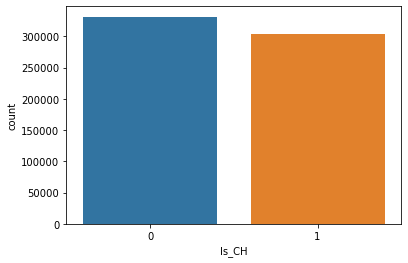

In [165]:
# Plot a count plot for the target label and notice the graph

import seaborn as sns
sns.countplot(data=combined_df.select(F.col('Is_CH')).toPandas(),x='Is_CH')

In [166]:
#get the cateorical columns and the numeric columns
catcols = [x for (x,y) in combined_df.dtypes if y=="string"]
numericCols = [x for (x,y) in combined_df.dtypes if (((y=="double")|(y=="int"))&(x!="Survived"))]
#initialize the output columns from the indexer
indexOutputCols = [x + "_idx" for x in catcols]
#initialize the output columns from the one hot encoder
oheCols = [x + "_ohe" for x in catcols]
indexOutputCols

['Attack_type_idx']

In [167]:
#specify the numeric columns that you need to choose
numericCols=[
 'Time',


 'DATA_R',


 'send_code',
 'Expaned_Energy']

In [168]:
numericCols

['Time', 'DATA_R', 'send_code', 'Expaned_Energy']

In [169]:
#StringIndexer: A label indexer that maps a string column of labels to an ML column of label indices.
stringIndexer = StringIndexer(inputCols=catcols,
                             outputCols=indexOutputCols,
                             handleInvalid='skip')

In [170]:
#one hot encoder
oheEncoder = OneHotEncoder(inputCols=indexOutputCols,outputCols=oheCols)

In [171]:
#A feature transformer that merges multiple columns into a vector column.
assemblerInputs = oheCols + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol="featuresCol")

In [172]:
#split the data to train, test and validation
trainDf,validate = combined_df.randomSplit([0.80,0.20],seed=42)
testDf,validDf= validate.randomSplit([0.5,0.5],seed=42)

In [173]:
from pyspark.ml.classification import RandomForestClassifier
#initialize random forrest classifier
rf = RandomForestClassifier(labelCol='Is_CH',featuresCol='featuresCol')
# create a pipe line for all stages
pipeline =Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,rf])
pipelineModel = pipeline.fit(trainDf)
# predict
predDF = pipelineModel.transform(testDf)

In [174]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
classificationEvaluator = MulticlassClassificationEvaluator(predictionCol='prediction',
                                         labelCol='Is_CH',
                                         metricName='accuracy')
accuracy = classificationEvaluator.evaluate(predDF)
accuracy

0.9895674340293622

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
# classification report to know precision,recall and f1 score
print(classification_report(predDF.select(['Is_CH']).collect(), predDF.select(['prediction']).collect()))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     33164
           1       0.98      1.00      0.99     30387

    accuracy                           0.99     63551
   macro avg       0.99      0.99      0.99     63551
weighted avg       0.99      0.99      0.99     63551



In [176]:
#predict the validation
valDF = pipelineModel.transform(validDf)

In [177]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
classificationEvaluator = MulticlassClassificationEvaluator(predictionCol='prediction',
                                         labelCol='Is_CH',
                                         metricName='accuracy')
# validation accuracy
accuracy = classificationEvaluator.evaluate(valDF)
accuracy

0.9902392103063847